In [1]:
import sys
from pathlib import Path
src_utils_path = Path("../../src/utils")
sys.path.append(str(src_utils_path))
import metrics as mjo
import yaml  

import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

import numpy as np
import xarray as xr 

In [2]:
lat_range = 20
lead = 35
memory_last = 0

In [3]:
with open('./best_config.yaml', 'r') as file:
    config = yaml.safe_load(file)

output_path = config['prediction_save_path']

In [4]:
fn_list = []
import re
for exp_num in range(1, 9):
    fn = re.sub(r"exp\d+/", f"exp{exp_num}/", output_path)
    fn_list.append(fn)

bcc, _ = mjo.get_skill_all_leads_ensemble_mean(
    fn_list=fn_list,
    datesta='2016-01-01',
    dateend='2021-12-31',
    leadmjo=lead,
    Fnmjo=config["data"]["target_path"]
)

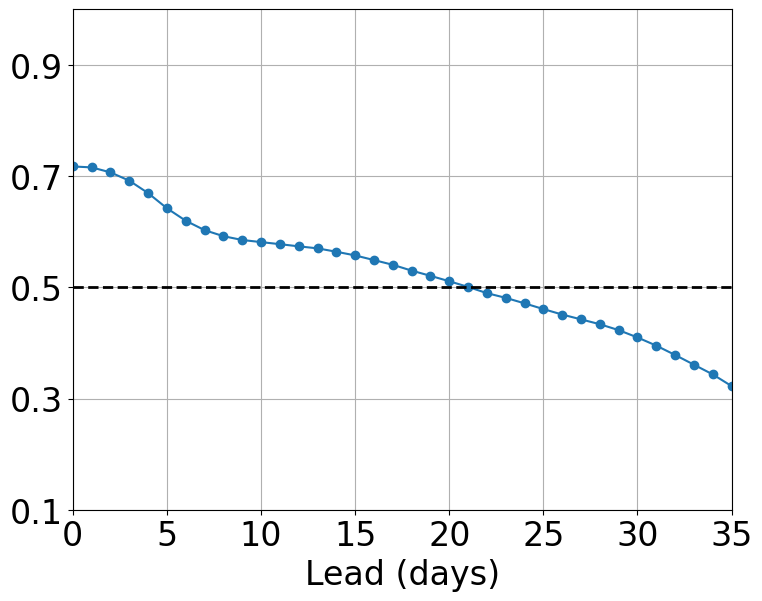

In [5]:
plt.rcParams['font.size']=24
fig, ax = plt.subplots(1,1, figsize=(8.5, 6.5))
plt.plot(np.arange(lead+1), bcc, 'o-', alpha=1, label=f'latavg')
plt.plot([0, 35], [0.5,0.5], '--', linewidth=2, color='black')
ax.set_xlim([0,35])
ax.set_xticks(np.arange(0,40,5))
ax.set_ylim([0.1,1.0])
ax.set_yticks(np.arange(0.1,1.0,0.2))
plt.xlabel('Lead (days)')
plt.grid()